In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = pd.read_csv('electricistan-national-energy-grid/data_preparation.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data['datetime_day_saving'] = pd.to_datetime(data['datetime_day_saving'])
data.set_index('datetime', inplace=True, drop=False)
data.head(3)


,datetime,power,datetime_day_saving,Is_15_Min_Interval,daylight_saving,datetime.1,week_days,month,date,First_Difference
datetime,,,,,,,,,,
2012-01-01 00:15:00,2012-01-01 00:15:00,3767,2012-01-01 00:15:00,True,False,2012-01-01 00:15:00,6,1,2012-01-01,NaN
2012-01-01 00:30:00,2012-01-01 00:30:00,3743,2012-01-01 00:30:00,True,False,2012-01-01 00:30:00,6,1,2012-01-01,-24.0
2012-01-01 00:45:00,2012-01-01 00:45:00,3691,2012-01-01 00:45:00,True,False,2012-01-01 00:45:00,6,1,2012-01-01,-52.0


<h2>Plot Histogramm</h2>


array([[<Axes: title={'center': 'power'}>]], dtype=object)

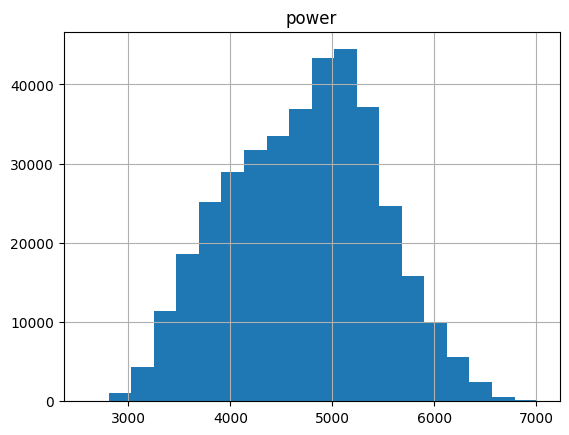

In [3]:
data.hist('power', bins=20)

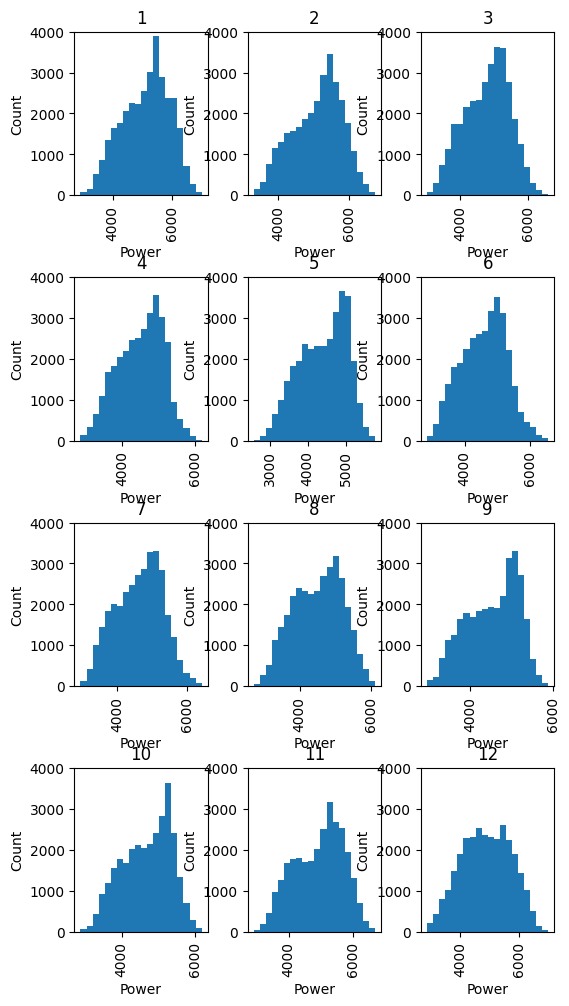

In [4]:
axes = data.hist('power', by='month', bins=20, layout=(4,3), figsize=(6,12))
for ax in axes.flatten():
    ax.set_xlabel('Power')
    ax.set_ylabel('Count')
    ax.set_ylim(bottom=0,top=4000)

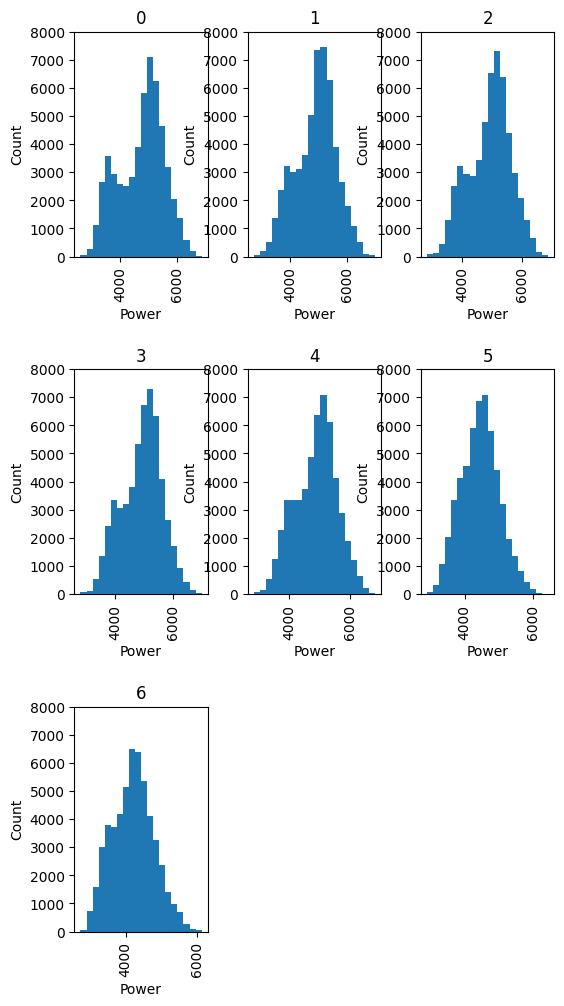

In [5]:
axes = data.hist('power', by='week_days', bins=20, layout=(3,3), figsize=(6,12))
for ax in axes.flatten():
    ax.set_xlabel('Power')
    ax.set_ylabel('Count')
    ax.set_ylim(bottom=0,top=8000)

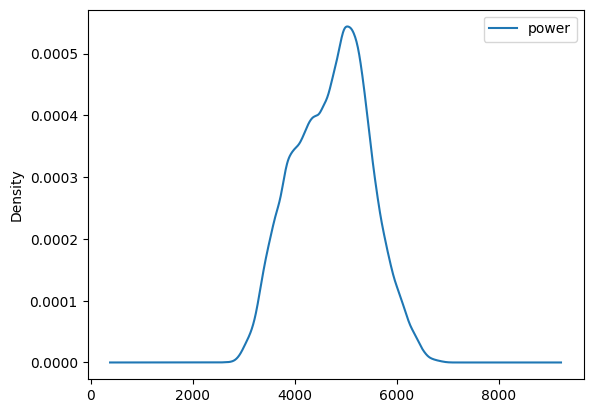

In [6]:
data[['power']].plot(kind='kde')
plt.show()

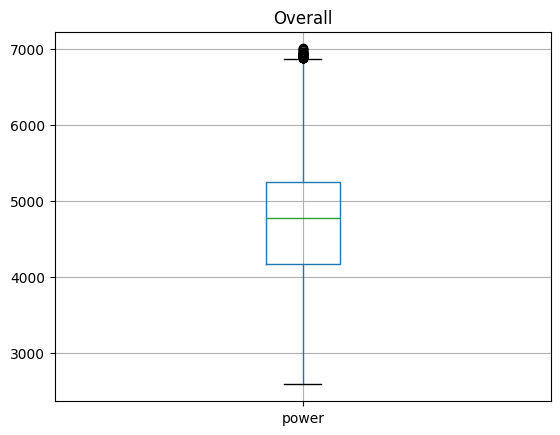

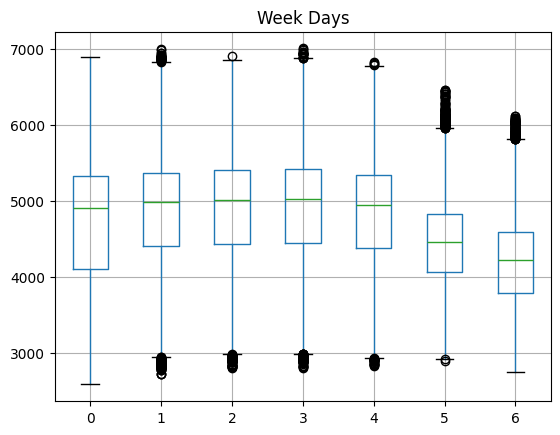

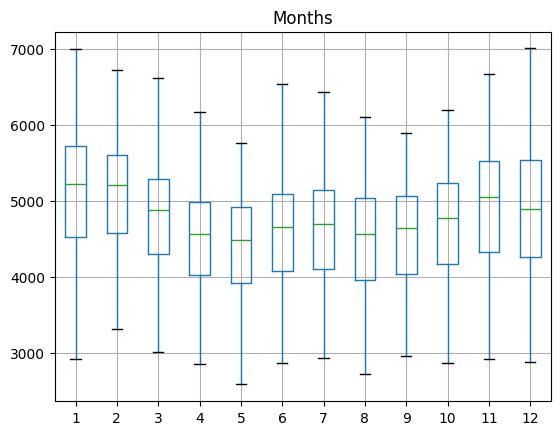

In [14]:
%matplotlib inline
%matplotlib inline
data[['datetime','power']].boxplot()
plt.title('Overall')
plt.show()
x = data[['datetime','week_days','power']].pivot(index='datetime', columns='week_days', values='power')
x.boxplot()
plt.title('Week Days')
plt.show()
x = data[['datetime','month','power']].pivot(index='datetime', columns='month', values='power')
x.boxplot()
plt.title('Months')
plt.show()

<IPython.core.display.Javascript object>


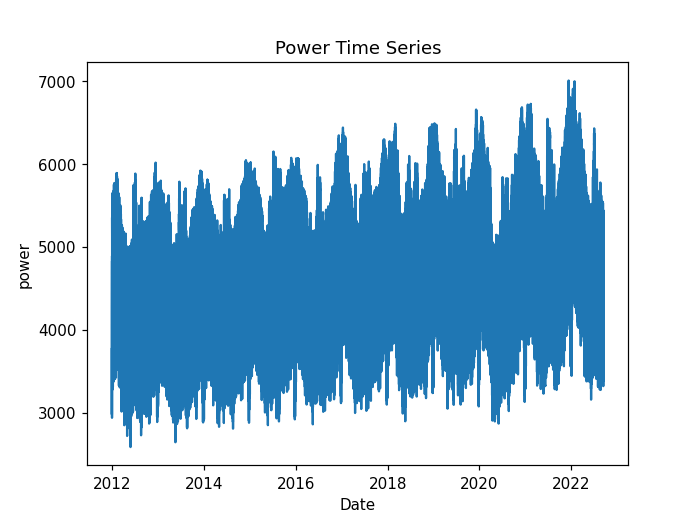

<IPython.core.display.Javascript object>


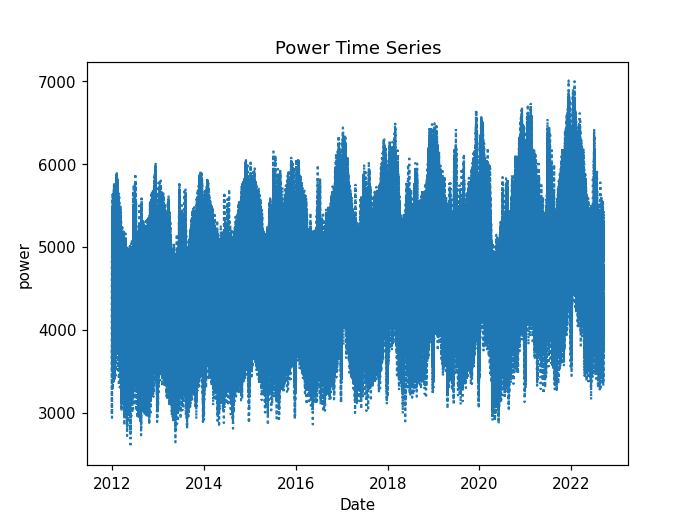

In [10]:
#start_time = pd.to_datetime('201-03-25 01:30:00')
#end_time = pd.to_datetime('2024-03-25 03:15:00')
#df_filtered = data.loc[data['datetime'].between(start_time, end_time, inclusive='both')]

%matplotlib notebook
f = plt.figure(1)
plt.plot(data[['power']], label = 'power')
plt.xlabel('Date')
plt.ylabel('power')
plt.title('Power Time Series')
f.show()

ff = plt.figure(2)
plt.plot(data[['power']], label = 'power', linestyle=":")
plt.xlabel('Date')
plt.ylabel('power')
plt.title('Power Time Series')
ff.show()


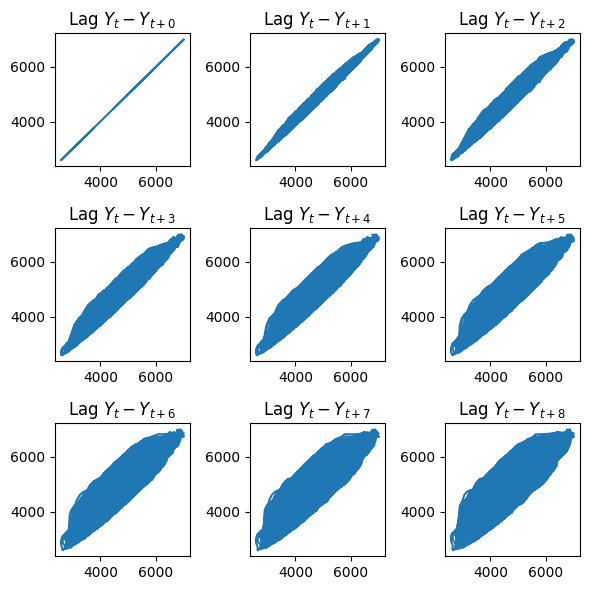

In [7]:
fig , axes  = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))

lag_counter = 0
for i in range(3):
    for j in range(3):
        df_lag = data.copy()
        df_lag['y'] = df_lag['power'].shift(-lag_counter)
        axes[i, j].plot(df_lag['power'], df_lag['y'])
        axes[i, j].set_title('Lag $Y_t - Y_{t+%i}$' %lag_counter)
        lag_counter = lag_counter+1

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'pyplot' is not defined

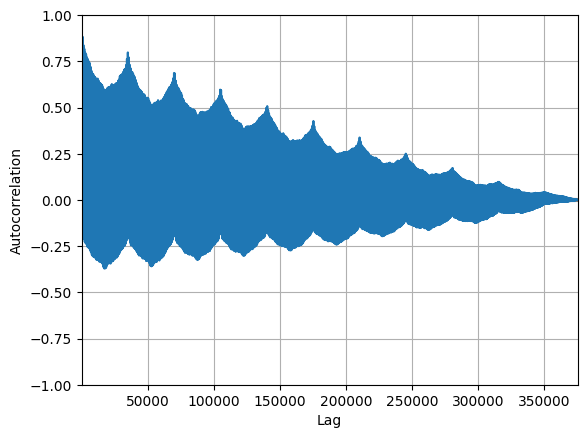

In [8]:
pd.plotting.autocorrelation_plot(data['power'])
plt.show()

<IPython.core.display.Javascript object>


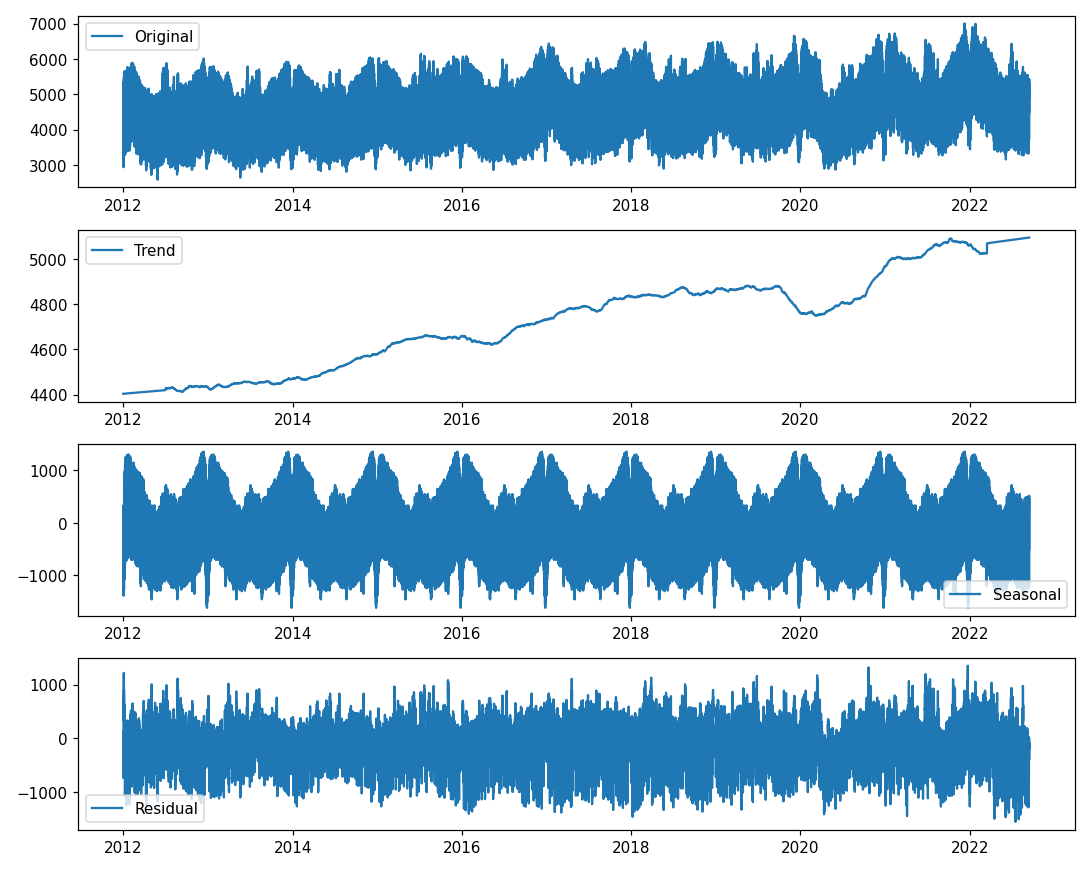

In [14]:
decomposition = sm.tsa.seasonal_decompose(data['power'], model='additive', extrapolate_trend='freq' ,period=35040)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(data['power'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()